In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_raw = pd.read_csv("실적데이터.csv")

# train 데이터 전처리

In [2]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   방송일시    38309 non-null  object 
 1   노출(분)   21525 non-null  float64
 2   마더코드    38309 non-null  int64  
 3   상품코드    38309 non-null  int64  
 4   상품명     38309 non-null  object 
 5   상품군     38309 non-null  object 
 6   판매단가    38309 non-null  int64  
 7   취급액     35379 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 2.3+ MB


In [3]:
df_raw

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019.1.1 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019.1.1 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019.1.1 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019.1.1 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019.1.1 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38304,2020.1.1 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38305,2020.1.1 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020.1.1 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020.1.1 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


## 요일 컬럼 만들기

In [4]:
temp = df_raw["방송일시"].str.split(' ').str[0]
temp

0        2019.1.1
1        2019.1.1
2        2019.1.1
3        2019.1.1
4        2019.1.1
           ...   
38304    2020.1.1
38305    2020.1.1
38306    2020.1.1
38307    2020.1.1
38308    2020.1.1
Name: 방송일시, Length: 38309, dtype: object

In [5]:
import datetime as dt
temp_time= [dt.datetime.strptime(date, '%Y.%m.%d') for date in temp]
temp_time

[datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 0, 0),
 datetime.da

In [6]:
type(temp_time)

list

In [7]:
df = pd.Series(temp_time)


In [8]:
a=df.dt.dayofweek   # modday = 0~ sunday= 6
a

0        1
1        1
2        1
3        1
4        1
        ..
38304    2
38305    2
38306    2
38307    2
38308    2
Length: 38309, dtype: int64

In [9]:
df_raw['요일']= pd.DataFrame(a)
df_raw

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일
0,2019.1.1 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1
1,2019.1.1 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1
2,2019.1.1 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1
3,2019.1.1 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1
4,2019.1.1 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1
...,...,...,...,...,...,...,...,...,...
38304,2020.1.1 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,2
38305,2020.1.1 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,2
38306,2020.1.1 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,2
38307,2020.1.1 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN,2


# 데이터 전처리

In [10]:
df_raw['노출(분)'] = df_raw['노출(분)'].fillna(method='ffill') # 앞 방향으로 채우기
df_raw['노출(분)']= df_raw['노출(분)'].astype(int)


In [11]:
df_raw = df_raw.dropna(axis=0)

df_raw.isnull().sum() 

방송일시     0
노출(분)    0
마더코드     0
상품코드     0
상품명      0
상품군      0
판매단가     0
취급액      0
요일       0
dtype: int64

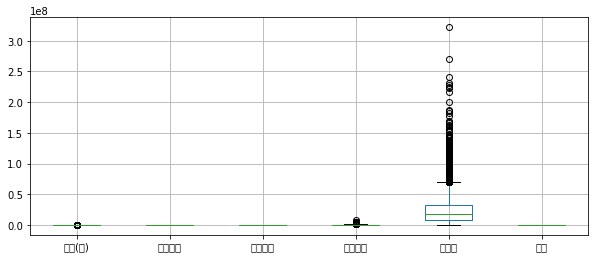

In [12]:
df_raw.boxplot(figsize=(10,4))

In [13]:
df_raw['판매단가']= df_raw['판매단가'].replace(',','', regex=True).astype(int)
df_raw['판매단가']

0         39900
1         39900
2         39900
3         39900
4         39900
          ...  
38299    148000
38300    178000
38301    168000
38302    158000
38303    148000
Name: 판매단가, Length: 35379, dtype: int32

In [14]:
year_month_day = df_raw["방송일시"].str.split(" ", n=2, expand=True)
df_raw['날짜'] = year_month_day[0].to_frame()
df_raw['시간'] = year_month_day[1].to_frame()

df_raw.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,날짜,시간
0,2019.1.1 6:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,2019.1.1,6:00
1,2019.1.1 6:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,2019.1.1,6:00
2,2019.1.1 6:20,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,2019.1.1,6:20
3,2019.1.1 6:20,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,2019.1.1,6:20
4,2019.1.1 6:40,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,2019.1.1,6:40


In [15]:
# df_raw = df_raw.drop(['방송일시', '날짜'], axis=1)

hour = df_raw["시간"].str.split(":", n=2, expand=True)
df_raw['시'] = hour[0].to_frame()
df_raw['분'] = hour[1].to_frame()

df_raw = df_raw.drop(['시간'], axis=1)

df_raw['시']= df_raw['시'].astype(int)
df_raw['분']= df_raw['분'].astype(int)

df_raw.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,날짜,시,분
0,2019.1.1 6:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,2019.1.1,6,0
1,2019.1.1 6:00,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,2019.1.1,6,0
2,2019.1.1 6:20,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,2019.1.1,6,20
3,2019.1.1 6:20,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,2019.1.1,6,20
4,2019.1.1 6:40,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,2019.1.1,6,40


In [17]:
year_month_day = df_raw["방송일시"].str.split(".", n=3, expand=True)
df_raw['년'] = year_month_day[0].to_frame()
df_raw['월'] = year_month_day[1].to_frame()
df_raw['일'] = year_month_day[1].to_frame()

df_raw['년']= df_raw['년'].astype(int)
df_raw['월']= df_raw['월'].astype(int)
df_raw['일']= df_raw['일'].astype(int)

df_raw = df_raw.drop(['년','방송일시','날짜'], axis=1)
df_raw.head()

,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,시,분,월,일
0,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,6,0,1,1
1,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,6,0,1,1
2,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,6,20,1,1
3,20,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,6,20,1,1
4,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,6,40,1,1


In [18]:
df_raw['상품군'].value_counts()
df_dummy = pd.get_dummies(df_raw['상품군'])
df_dummy = df_raw.join(df_dummy.add_prefix('상품군_'))
df_dummy = df_dummy.drop(['상품군'], axis=1)
df_dummy.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,요일,시,분,월,...,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000.0,1,6,0,1,...,0,0,0,0,0,1,0,0,0,0
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000.0,1,6,0,1,...,0,0,0,0,0,1,0,0,0,0
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000.0,1,6,20,1,...,0,0,0,0,0,1,0,0,0,0
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000.0,1,6,20,1,...,0,0,0,0,0,1,0,0,0,0
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000.0,1,6,40,1,...,0,0,0,0,0,1,0,0,0,0


In [19]:
df_raw = df_dummy
df_raw.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,요일,시,분,월,...,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000.0,1,6,0,1,...,0,0,0,0,0,1,0,0,0,0
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000.0,1,6,0,1,...,0,0,0,0,0,1,0,0,0,0
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000.0,1,6,20,1,...,0,0,0,0,0,1,0,0,0,0
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000.0,1,6,20,1,...,0,0,0,0,0,1,0,0,0,0
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000.0,1,6,40,1,...,0,0,0,0,0,1,0,0,0,0


In [20]:
# 상품명 성별 포함 고려해 새로운 column 추가하기
condition_list=[
    (df_raw['상품명'].str.contains('여성|브라|오모떼|보정팬티|뷰티')),
    (df_raw['상품명'].str.contains('남성'))
]
value_list=['여', '남']
df_raw['성별']=np.select(condition_list,value_list)
df_raw.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,요일,시,분,월,...,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000.0,1,6,0,1,...,0,0,0,0,1,0,0,0,0,남
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000.0,1,6,0,1,...,0,0,0,0,1,0,0,0,0,여
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000.0,1,6,20,1,...,0,0,0,0,1,0,0,0,0,남
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000.0,1,6,20,1,...,0,0,0,0,1,0,0,0,0,여
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000.0,1,6,40,1,...,0,0,0,0,1,0,0,0,0,남


In [21]:
df_dummy = pd.get_dummies(df_raw['성별'])
df_dummy = df_raw.join(df_dummy.add_prefix('성별_'))

df_dummy = df_dummy.drop(['성별'], axis=1)

df_raw = df_dummy
df_raw.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,요일,시,분,월,...,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000.0,1,6,0,1,...,0,0,1,0,0,0,0,0,1,0
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000.0,1,6,0,1,...,0,0,1,0,0,0,0,0,0,1
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000.0,1,6,20,1,...,0,0,1,0,0,0,0,0,1,0
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000.0,1,6,20,1,...,0,0,1,0,0,0,0,0,0,1
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000.0,1,6,40,1,...,0,0,1,0,0,0,0,0,1,0


## 무이자 일시불

In [22]:
condition_list=[
    (df_raw['상품명'].str.contains('무이자')),
    (df_raw['상품명'].str.contains('일시불'))
]
value_list=['무이자', '일시불']
df_raw['무이자or일시불']=np.select(condition_list,value_list)
df_raw.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,요일,시,분,월,...,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000.0,1,6,0,1,...,0,1,0,0,0,0,0,1,0,0
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000.0,1,6,0,1,...,0,1,0,0,0,0,0,0,1,0
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000.0,1,6,20,1,...,0,1,0,0,0,0,0,1,0,0
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000.0,1,6,20,1,...,0,1,0,0,0,0,0,0,1,0
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000.0,1,6,40,1,...,0,1,0,0,0,0,0,1,0,0


In [23]:
df_dummy = pd.get_dummies(df_raw['무이자or일시불'])
df_dummy = df_raw.join(df_dummy.add_prefix('무이자or일시불='))

df_dummy = df_dummy.drop(['무이자or일시불'], axis=1)

df_raw = df_dummy
df_raw.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,요일,시,분,월,...,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000.0,1,6,0,1,...,0,0,0,0,0,1,0,1,0,0
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000.0,1,6,0,1,...,0,0,0,0,0,0,1,1,0,0
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000.0,1,6,20,1,...,0,0,0,0,0,1,0,1,0,0
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000.0,1,6,20,1,...,0,0,0,0,0,0,1,1,0,0
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000.0,1,6,40,1,...,0,0,0,0,0,1,0,1,0,0


In [24]:
condition_list=[
    (df_raw['상품명'].str.contains('여름')),
    (df_raw['상품명'].str.contains('겨울|니트|기모|온수|단열|패딩|무스탕|방한|덕다운|히터|스웨터|롱패딩'))
]
value_list=['여름', '겨울']
df_raw['계절']=np.select(condition_list,value_list)
df_raw.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,요일,시,분,월,...,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000.0,1,6,0,1,...,0,0,0,0,1,0,1,0,0,겨울
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000.0,1,6,0,1,...,0,0,0,0,0,1,1,0,0,겨울
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000.0,1,6,20,1,...,0,0,0,0,1,0,1,0,0,겨울
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000.0,1,6,20,1,...,0,0,0,0,0,1,1,0,0,겨울
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000.0,1,6,40,1,...,0,0,0,0,1,0,1,0,0,겨울


In [25]:
df_dummy = pd.get_dummies(df_raw['계절'])
df_dummy = df_raw.join(df_dummy.add_prefix('계절_'))

df_dummy = df_dummy.drop(['계절'], axis=1)

df_raw = df_dummy
df_raw.head()

,노출(분),마더코드,상품코드,상품명,판매단가,취급액,요일,시,분,월,...,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름
0,20,100346,201072,테이트 남성 셀린니트3종,39900,2099000.0,1,6,0,1,...,0,0,1,0,1,0,0,0,1,0
1,20,100346,201079,테이트 여성 셀린니트3종,39900,4371000.0,1,6,0,1,...,0,0,0,1,1,0,0,0,1,0
2,20,100346,201072,테이트 남성 셀린니트3종,39900,3262000.0,1,6,20,1,...,0,0,1,0,1,0,0,0,1,0
3,20,100346,201079,테이트 여성 셀린니트3종,39900,6955000.0,1,6,20,1,...,0,0,0,1,1,0,0,0,1,0
4,20,100346,201072,테이트 남성 셀린니트3종,39900,6672000.0,1,6,40,1,...,0,0,1,0,1,0,0,0,1,0


In [26]:
df_raw = df_raw.drop(['상품명'], axis=1)
df = df_raw
df.head()

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,...,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름
0,20,100346,201072,39900,2099000.0,1,6,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,20,100346,201079,39900,4371000.0,1,6,0,1,1,...,0,0,0,1,1,0,0,0,1,0
2,20,100346,201072,39900,3262000.0,1,6,20,1,1,...,0,0,1,0,1,0,0,0,1,0
3,20,100346,201079,39900,6955000.0,1,6,20,1,1,...,0,0,0,1,1,0,0,0,1,0
4,20,100346,201072,39900,6672000.0,1,6,40,1,1,...,0,0,1,0,1,0,0,0,1,0


## 주문량 컬럼 만들기

In [27]:
df_raw['판매단가']=df_raw['판매단가'].astype(int)

In [28]:
df_raw["취급액"]=df_raw["취급액"].astype(int)

In [29]:
df_raw["주문량"]=df_raw["취급액"]/df_raw["판매단가"]
df_raw["주문량"] =round(df_raw["주문량"]).astype(int)
df_raw.head()

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,...,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량
0,20,100346,201072,39900,2099000,1,6,0,1,1,...,0,1,0,1,0,0,0,1,0,53
1,20,100346,201079,39900,4371000,1,6,0,1,1,...,0,0,1,1,0,0,0,1,0,110
2,20,100346,201072,39900,3262000,1,6,20,1,1,...,0,1,0,1,0,0,0,1,0,82
3,20,100346,201079,39900,6955000,1,6,20,1,1,...,0,0,1,1,0,0,0,1,0,174
4,20,100346,201072,39900,6672000,1,6,40,1,1,...,0,1,0,1,0,0,0,1,0,167


# 시청률 데이터랑 합치기

In [31]:
df_time_mean = pd.read_csv("df_time_mean.csv", encoding='cp949')
df_time_mean.head()

,시청률,월,일,시,분
0,0.0007,1,1,2,0
1,0.0000,1,1,2,20
2,0.0000,1,1,2,40
3,0.0000,1,1,3,0
4,0.0000,1,1,3,20


In [32]:
merge_df = pd.merge(left = df, right=df_time_mean, how='left', \
                  on=['월','일','시','분'], sort=False)

In [33]:
merge_df.head()

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,...,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
0,20,100346,201072,39900,2099000,1,6,0,1,1,...,1,0,1,0,0,0,1,0,53,0.0
1,20,100346,201079,39900,4371000,1,6,0,1,1,...,0,1,1,0,0,0,1,0,110,0.0
2,20,100346,201072,39900,3262000,1,6,20,1,1,...,1,0,1,0,0,0,1,0,82,0.0
3,20,100346,201079,39900,6955000,1,6,20,1,1,...,0,1,1,0,0,0,1,0,174,0.0
4,20,100346,201072,39900,6672000,1,6,40,1,1,...,1,0,1,0,0,0,1,0,167,0.0


In [36]:
# time6 =df_broad[df_broad['시간']=='6:00'][['시간','상품명','취급액','상품군']]
# time6['상품군'].value_counts()

0     91
2     63
1     57
6     56
8     36
7     32
4     25
3      6
10     6
9      5
Name: 상품군, dtype: int64

In [34]:
merge_df.corr()

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,...,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
노출(분),1.000000,0.089795,0.081406,0.134704,0.046549,-0.006729,-0.003936,-0.067666,-0.042781,-0.042781,...,-0.020391,0.065019,-0.015976,0.012036,0.008359,0.034603,-0.033782,-0.007787,-0.055127,-0.012845
마더코드,0.089795,1.000000,0.977926,-0.205652,-0.054361,-0.034271,-0.099454,-0.016732,-0.085851,-0.085851,...,-0.045554,0.022762,-0.054564,0.036598,0.033057,-0.013970,0.009375,0.031287,-0.002432,-0.028078
상품코드,0.081406,0.977926,1.000000,-0.217107,-0.041807,-0.034529,-0.101219,-0.018006,-0.102004,-0.102004,...,-0.048393,0.017955,-0.043623,0.021265,0.034418,-0.013244,0.008825,0.030077,0.007830,-0.031066
판매단가,0.134704,-0.205652,-0.217107,1.000000,-0.161539,0.064539,0.332901,0.038726,-0.044226,-0.044226,...,-0.144905,-0.150610,-0.407373,0.285136,0.234906,0.103807,-0.102324,-0.016887,-0.369417,-0.033378
취급액,0.046549,-0.054361,-0.041807,-0.161539,1.000000,0.066716,0.078525,0.218687,0.068203,0.068203,...,0.064035,0.028082,0.243436,-0.183578,-0.127194,0.035174,-0.035402,-0.000904,0.763101,0.052377
요일,-0.006729,-0.034271,-0.034529,0.064539,0.066716,1.000000,-0.004463,0.011115,-0.015749,-0.015749,...,0.051556,0.011147,-0.037534,0.023419,0.024495,-0.011871,0.010370,0.010718,0.021744,-0.004611
시,-0.003936,-0.099454,-0.101219,0.332901,0.078525,-0.004463,1.000000,0.016762,-0.005825,-0.005825,...,-0.104836,-0.141667,-0.264136,0.168147,0.169032,0.097065,-0.092672,-0.035631,-0.070505,0.092038
분,-0.067666,-0.016732,-0.018006,0.038726,0.218687,0.011115,0.016762,1.000000,0.011099,0.011099,...,-0.006815,-0.013349,-0.011301,0.008981,0.005446,0.004578,-0.004503,-0.000805,0.127449,0.022269
월,-0.042781,-0.085851,-0.102004,-0.044226,0.068203,-0.015749,-0.005825,0.011099,1.000000,1.000000,...,-0.001508,-0.049213,0.141049,-0.089951,-0.090103,-0.139544,0.141216,-0.001494,0.073468,0.240725
일,-0.042781,-0.085851,-0.102004,-0.044226,0.068203,-0.015749,-0.005825,0.011099,1.000000,1.000000,...,-0.001508,-0.049213,0.141049,-0.089951,-0.090103,-0.139544,0.141216,-0.001494,0.073468,0.240725


In [ ]:
merge_df = merge_df.dropna(axis=0)
merge_df.head()

In [48]:
pd.set_option("max_rows", 10)
grouped= merge_df[['시청률']].groupby(merge_df['요일'])
grouped['시청률'].mean()


요일
0    0.004513
1    0.004369
2    0.004386
3    0.004456
4    0.004216
5    0.004401
6    0.004395
Name: 시청률, dtype: float64

## 요일별 최대 시청률, 최다 주문량일때의 상품정보 조회

## 월요일

In [86]:
pd.set_option('display.max_columns', 100)
monday_df = merge_df[merge_df['요일']==0]
monday_df['시청률'].sort_values(ascending=False)

30106    0.0411
31368    0.0411
30105    0.0411
31990    0.0411
31991    0.0411
          ...  
15135    0.0000
15136    0.0000
15157    0.0000
15169    0.0000
511      0.0000
Name: 시청률, Length: 4767, dtype: float64

In [143]:
monday_df[monday_df['시청률']==0.0411]

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
30105,20,100374,201214,79000,13087000,0,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,166,0.0411
30106,20,100374,201218,79000,4069000,0,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,52,0.0411
30758,20,100766,202239,59000,46648000,0,19,20,11,11,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,791,0.0411
31368,20,100327,201032,54000,55491000,0,19,20,11,11,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1028,0.0411
31990,20,100249,200834,79900,12081000,0,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,151,0.0411
31991,20,100249,200836,79900,10668000,0,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,134,0.0411


In [90]:
monday_df[monday_df['시청률']==0.0411]['주문량'].sort_values(ascending=False)

31368    1028
30758     791
30105     166
31990     151
31991     134
30106      52
Name: 주문량, dtype: int32

In [91]:
monday_df[monday_df['주문량']==1028]

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
31368,20,100327,201032,54000,55491000,0,19,20,11,11,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1028,0.0411


## 화요일

In [119]:
pd.set_option('display.max_columns', 100)
tues_df = merge_df[merge_df['요일']==1]
tues_df['시청률'].sort_values(ascending=False)

30195    0.0411
31472    0.0411
30196    0.0411
30828    0.0411
31471    0.0411
          ...  
17253    0.0000
17252    0.0000
17243    0.0000
17231    0.0000
0        0.0000
Name: 시청률, Length: 4906, dtype: float64

In [142]:
tues_df[tues_df['시청률']==0.0411]

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
30195,20,100453,201405,59000,6927000,1,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,117,0.0411
30196,20,100453,201397,69000,5732000,1,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,83,0.0411
30828,20,100327,201032,54000,68657000,1,19,20,11,11,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1271,0.0411
31471,20,100483,201460,64800,10826000,1,19,20,11,11,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,167,0.0411
31472,20,100483,201461,60800,18097000,1,19,20,11,11,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,298,0.0411
32075,20,100052,200135,59800,35281000,1,19,20,11,11,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,590,0.0411


In [120]:
tues_df[tues_df['시청률']==0.0411]['주문량'].sort_values(ascending=False)

30828    1271
32075     590
31472     298
31471     167
30195     117
30196      83
Name: 주문량, dtype: int32

In [121]:
tues_df[(tues_df['주문량']==1271) & (tues_df['시청률']==0.0411)]

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
30828,20,100327,201032,54000,68657000,1,19,20,11,11,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1271,0.0411


## 수요일

In [122]:
pd.set_option('display.max_columns', 100)
wends_df = merge_df[merge_df['요일']==2]
wends_df['시청률'].sort_values(ascending=False)

30929    0.0411
30292    0.0411
32159    0.0411
31549    0.0411
32158    0.0411
          ...  
14658    0.0000
14653    0.0000
14648    0.0000
14647    0.0000
58       0.0000
Name: 시청률, Length: 4909, dtype: float64

In [141]:
wends_df[wends_df['시청률']==0.0411]

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
30292,20,100062,200152,149000,54301000,2,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,364,0.0411
30929,20,100091,200248,899000,32493000,2,19,20,11,11,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,36,0.0411
31548,20,100107,200298,139000,29360000,2,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,211,0.0411
31549,20,100107,200301,139000,13771000,2,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,99,0.0411
32158,20,100249,200834,79900,11843000,2,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,148,0.0411
32159,20,100249,200836,79900,10602000,2,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,133,0.0411


In [123]:
wends_df[wends_df['시청률']==0.0411]['주문량'].sort_values(ascending=False)

30292    364
31548    211
32158    148
32159    133
31549     99
30929     36
Name: 주문량, dtype: int32

In [124]:
wends_df[(wends_df['주문량']==364) & (wends_df['시청률']==0.0411)]

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
30292,20,100062,200152,149000,54301000,2,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,364,0.0411


### 목요일

In [125]:
pd.set_option('display.max_columns', 100)
thurs_df = merge_df[merge_df['요일']==3]
thurs_df['시청률'].sort_values(ascending=False)

31027    0.0411
30395    0.0411
30396    0.0411
30397    0.0411
31658    0.0411
          ...  
17443    0.0000
17437    0.0000
34969    0.0000
17416    0.0000
158      0.0000
Name: 시청률, Length: 4756, dtype: float64

In [140]:
thurs_df[thurs_df['시청률']==0.0411]

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
30395,20,100501,201516,239000,2895000,3,19,20,11,11,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,12,0.0411
30396,20,100501,201518,219000,5906000,3,19,20,11,11,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,27,0.0411
30397,20,100501,201517,418000,6533000,3,19,20,11,11,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,16,0.0411
31027,20,100501,201519,189000,29842000,3,19,20,11,11,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,158,0.0411
31658,20,100834,202451,59000,11907000,3,19,20,11,11,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,202,0.0411
31659,20,100834,202454,59000,4262000,3,19,20,11,11,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,72,0.0411
32248,20,100062,200152,149000,64092000,3,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,430,0.0411


In [126]:
thurs_df[thurs_df['시청률']==0.0411]['주문량'].sort_values(ascending=False)

32248    430
31658    202
31027    158
31659     72
30396     27
30397     16
30395     12
Name: 주문량, dtype: int32

In [127]:
thurs_df[(thurs_df['주문량']==430) & (thurs_df['시청률']==0.0411)]

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
32248,20,100062,200152,149000,64092000,3,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,430,0.0411


### 금요일

In [128]:
pd.set_option('display.max_columns', 100)
fri_df = merge_df[merge_df['요일']==4]
fri_df['시청률'].sort_values(ascending=False)

31111    0.0411
31110    0.0411
32356    0.0411
31759    0.0411
29818    0.0411
          ...  
14828    0.0000
14835    0.0000
14836    0.0000
14838    0.0000
250      0.0000
Name: 시청률, Length: 4675, dtype: float64

In [139]:
fri_df[fri_df['시청률']==0.0411]

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
29818,20,100741,202170,40900,27107000,4,19,20,11,11,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,663,0.0411
30500,20,100248,200829,59900,26258000,4,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,438,0.0411
30501,20,100248,200831,59900,15359000,4,19,20,11,11,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,256,0.0411
31110,20,100654,201980,75050,30292000,4,19,20,11,11,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,404,0.0411
31111,20,100654,201977,79000,6569000,4,19,20,11,11,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,83,0.0411
31759,20,100610,201867,89000,32462000,4,19,20,11,11,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,365,0.0411
31760,20,100610,201864,89000,13238000,4,19,20,11,11,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,149,0.0411
31761,20,100610,201905,89000,2228000,4,19,20,11,11,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,25,0.0411
32356,20,100323,201025,49900,29131000,4,19,20,11,11,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,584,0.0411


In [129]:
fri_df[fri_df['시청률']==0.0411]['주문량'].sort_values(ascending=False)

29818    663
32356    584
30500    438
31110    404
31759    365
30501    256
31760    149
31111     83
31761     25
Name: 주문량, dtype: int32

In [130]:
fri_df[(fri_df['주문량']==663) & (fri_df['시청률']==0.0411)]

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
29818,20,100741,202170,40900,27107000,4,19,20,11,11,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,663,0.0411


### 토요일

In [131]:
pd.set_option('display.max_columns', 100)
sat_df = merge_df[merge_df['요일']==5]
sat_df['시청률'].sort_values(ascending=False)

32451    0.04110
10607    0.03945
9085     0.03945
9086     0.03945
9854     0.03945
          ...   
20452    0.00000
20451    0.00000
8355     0.00000
8356     0.00000
331      0.00000
Name: 시청률, Length: 4486, dtype: float64

In [138]:
sat_df[sat_df['시청률']==0.0411]

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
32451,20,100029,200043,119000,31305000,5,19,20,11,11,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,263,0.0411


In [132]:
sat_df[sat_df['시청률']==0.0411]['주문량'].sort_values(ascending=False)

32451    263
Name: 주문량, dtype: int32

In [133]:
sat_df[(sat_df['주문량']==263) & (sat_df['시청률']==0.0411)]

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
32451,20,100029,200043,119000,31305000,5,19,20,11,11,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,263,0.0411


### 일요일

In [134]:
pd.set_option('display.max_columns', 100)
sun_df = merge_df[merge_df['요일']==6]
sun_df['시청률'].sort_values(ascending=False)

11421    0.03945
10695    0.03945
10694    0.03945
10697    0.03835
10696    0.03835
          ...   
15024    0.00000
15027    0.00000
15029    0.00000
15038    0.00000
426      0.00000
Name: 시청률, Length: 4968, dtype: float64

In [137]:
sun_df[sun_df['시청률']==0.03945]

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
10694,20,100127,200344,69900,22616000,6,14,20,4,4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,324,0.03945
10695,20,100127,200355,69900,16652000,6,14,20,4,4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,238,0.03945
11421,20,100226,200788,52900,47596000,6,14,20,4,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,900,0.03945


In [135]:
sun_df[sun_df['시청률']==0.03945]['주문량'].sort_values(ascending=False)

11421    900
10694    324
10695    238
Name: 주문량, dtype: int32

In [136]:
sun_df[(sun_df['주문량']==900) & (sun_df['시청률']==0.03945)]

,노출(분),마더코드,상품코드,판매단가,취급액,요일,시,분,월,일,상품군_가구,상품군_가전,상품군_건강기능,상품군_농수축,상품군_생활용품,상품군_속옷,상품군_의류,상품군_이미용,상품군_잡화,상품군_주방,상품군_침구,성별_0,성별_남,성별_여,무이자or일시불=0,무이자or일시불=무이자,무이자or일시불=일시불,계절_0,계절_겨울,계절_여름,주문량,시청률
11421,20,100226,200788,52900,47596000,6,14,20,4,4,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,900,0.03945
